# Pixel Coordinate Prediction using CNN

Name: Rakesh Kumar Jagdev  
Course: BTECH CSE (AI/ML)
Topic: Supervised Regression using Deep Learning
About the Project: This project focuses on predicting the location of a single activated pixel in a 50×50 grayscale image using a Convolutional Neural Network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

Datasets

In [2]:
def generate_dataset(samples=7500, size=50):
    X = []
    y = []
    
    for _ in range(samples):
        img = np.zeros((size, size), dtype=np.float32)

        x = np.random.randint(0, size)
        y_pos = np.random.randint(0, size)

        img[y_pos, x] = 255.0
        img = img / 255.0

        X.append(img)
        y.append([x / size, y_pos / size])

    return np.array(X), np.array(y)
X, y = generate_dataset()
X = X[..., np.newaxis]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train:", X_train.shape)
print("Validation:", X_val.shape)


Train: (6000, 50, 50, 1)
Validation: (1500, 50, 50, 1)


Model (creation)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation="relu", input_shape=(50, 50, 1)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(2)
])
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)
model.summary()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [4]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0264 - mae: 0.0918 - val_loss: 0.0024 - val_mae: 0.0318
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0014 - mae: 0.0248 - val_loss: 9.3009e-04 - val_mae: 0.0209
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0735e-04 - mae: 0.0166 - val_loss: 4.8708e-04 - val_mae: 0.0151
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.0013e-04 - mae: 0.0142 - val_loss: 3.6155e-04 - val_mae: 0.0138
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3413e-04 - mae: 0.0134 - val_loss: 3.0291e-04 - val_mae: 0.0125
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4820e-04 - mae: 0.0115 - val_loss: 2.3649e-04 - val_mae: 0.0114
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7849e-04 - mae: 0.0098 - val_loss: 1.6585e-04 - val_mae: 0.0094
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9445e-04 - mae: 0.0104 - val_loss: 1.6873e-04 - val_mae: 0.0094
Epo

Loss Plot

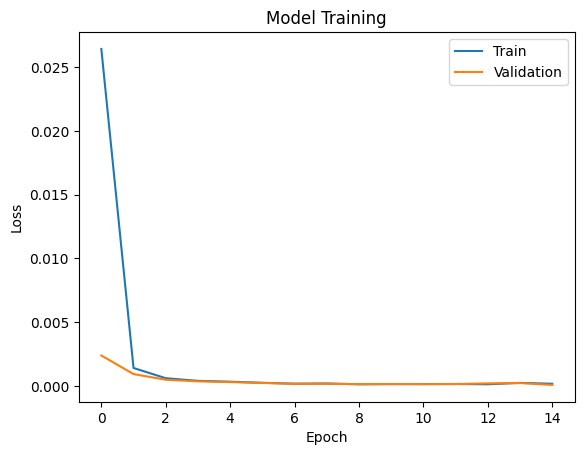

In [5]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Training")
plt.legend()
plt.show()


Result (visualization)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


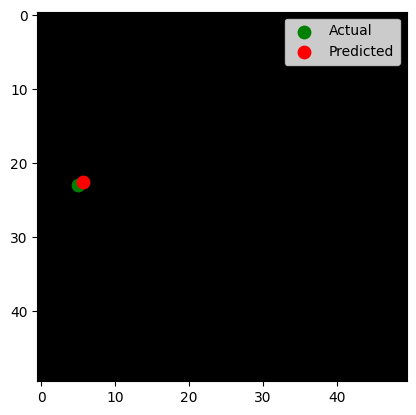

Actual: 5.0 23.0
Predicted: 5.6694307 22.552586


In [6]:
i = np.random.randint(len(X_val))
img = X_val[i]
true = y_val[i]
pred = model.predict(img[np.newaxis])[0]
true_x, true_y = true * 50
pred_x, pred_y = pred * 50
plt.imshow(img.squeeze(), cmap="gray")
plt.scatter(true_x, true_y, c="green", s=80, label="Actual")
plt.scatter(pred_x, pred_y, c="red", s=80, label="Predicted")
plt.legend()
plt.show()
print("Actual:", true_x, true_y)
print("Predicted:", pred_x, pred_y)


Observations:

While working on this project, I observed that the model learns very quickly because only one pixel is active in each image.
Initially, the loss was high, but it reduced significantly after a few epochs. The predicted coordinates were usually very close to the actual position.
Using a CNN helped in capturing the spatial information effectively.
Overall, the model performed well for this controlled setup.
